## Moving averages

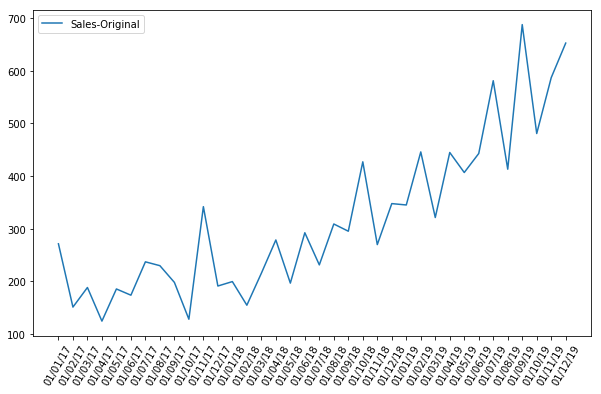

In [3]:
# import needful libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read dataset
sales_data = pd.read_csv('sales.csv')

# Setting figure size
plt.figure(figsize=(10,6))
# Plot original sales data
plt.plot(sales_data['Time'], sales_data['Sales'], label="Sales-Original")
# Rotate xlabels
plt.xticks(rotation=60)
# Add legends
plt.legend()
#display the plot
plt.show()

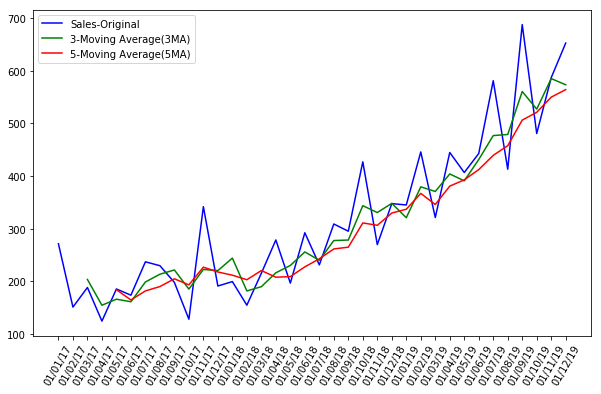

In [29]:
# Moving average with window 3
sales_data['3MA']=sales_data['Sales'].rolling(window=3).mean()
# Moving average with window 5
sales_data['5MA']=sales_data['Sales'].rolling(window=5).mean()
# Setting figure size
plt.figure(figsize=(10,6))
# Plot original sales data
plt.plot(sales_data['Time'], sales_data['Sales'], label="Sales-Original", color="blue")
# Plot 3-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['3MA'], label="3-Moving Average(3MA)", color="green")
# Plot 5-Moving Average of sales data
plt.plot(sales_data['Time'], sales_data['5MA'], label="5-Moving Average(5MA)", color="red")
# Rotate xlabels
plt.xticks(rotation=60)
# Add legends
plt.legend()
#display the plot
plt.show()

## Window Function

In [8]:
# import needful libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read dataset
sales_data = pd.read_csv('sales.csv', index_col ="Time")

# Show initial 5 records
sales_data.head()

,Sales
Time,
01/01/17,271.5
01/02/17,151.4
01/03/17,188.6
01/04/17,124.8
01/05/17,185.8


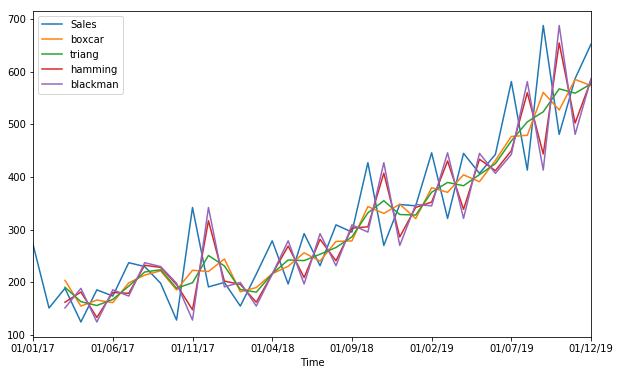

In [9]:
# Apply all the windows on given DataFrame 
sales_data['boxcar']=sales_data.Sales.rolling(3, win_type ='boxcar').mean()
sales_data['triang']=sales_data.Sales.rolling(3, win_type ='triang').mean()
sales_data['hamming']=sales_data.Sales.rolling(3, win_type ='hamming').mean()
sales_data['blackman']=sales_data.Sales.rolling(3, win_type ='blackman').mean()
#Plot the rolling mean of all the windows
sales_data.plot(kind='line',figsize=(10,6))

## Defining cointegration

In [6]:
# Import required library
import statsmodels.api as sm
import pandas as pd
import statsmodels.tsa.stattools as ts
import numpy as np
 
# Calculate ADF function    
def calc_adf(x, y):
    result = sm.OLS(x, y).fit()    
    return ts.adfuller(result.resid)

# Read the Dataset
data = sm.datasets.sunspots.load_pandas().data.values
N = len(data)
 
# Create Sine wave and apply ADF test    
t = np.linspace(-2 * np.pi, 2 * np.pi, N)
sine = np.sin(np.sin(t))
print("Self ADF", calc_adf(sine, sine))

# Apply ADF test on Sine and Sine with noise 
noise = np.random.normal(0, .01, N)
print("ADF sine with noise", calc_adf(sine, sine + noise))

# Apply ADF test on Sine and Cosine with noise 
cosine = 100 * np.cos(t) + 10
print("ADF sine vs cosine with noise", calc_adf(sine, cosine + noise))

# Apply ADF test on Sine and sunspots dataset
print("Sine vs sunspots", calc_adf(sine, data))

Self ADF (nan, nan, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -inf)
ADF sine with noise (-16.485099157161727, 2.2187370406839064e-29, 0, 308, {'1%': -3.45176116018037, '5%': -2.870970093607691, '10%': -2.571794416006072}, -1821.724012663417)
ADF sine vs cosine with noise (-18.671794360051937, 2.0444597089750172e-30, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -11091.635191028507)
Sine vs sunspots (-6.7242691810701025, 3.4210811915548775e-09, 16, 292, {'1%': -3.4529449243622383, '5%': -2.871489553425686, '10%': -2.572071437887033}, -1102.5867415291168)


## Decomposing time series

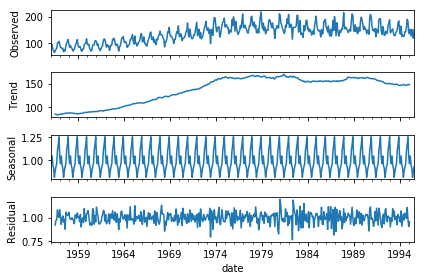

In [46]:
# import needful libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Read the dataset
data = pd.read_csv('beer_production.csv')
data.columns= ['date','data']
# Change datatype to pandas datetime
data['date'] = pd.to_datetime(data['date'])
data=data.set_index('date')

# Decompose the data
decomposed_data = seasonal_decompose(data, model='multiplicative')
# Plot decomposed data
decomposed_data.plot()
# Display the plot
plt.show()

## Autocorrelation

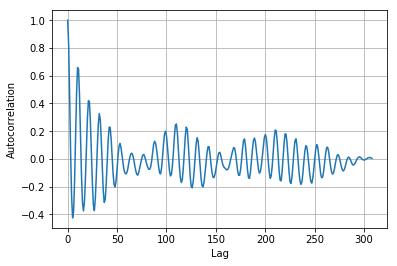

In [12]:
# import needful libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data

# Calculate autocorrelation using numpy
dy = data.SUNACTIVITY - np.mean(data.SUNACTIVITY)
dy_square = np.sum(dy ** 2)

# Cross-correlation
sun_correlated = np.correlate(dy, dy, mode='full')/dy_square
result = sun_correlated[int(len(sun_correlated)/2):]

# Diplay the Chart
plt.plot(result)
# Display grid
plt.grid(True)
# Add labels
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
# Display the chart
plt.show()

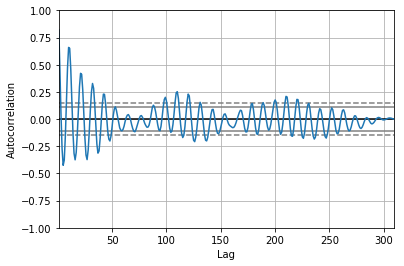

In [13]:
from pandas.plotting import autocorrelation_plot
# Plot using pandas function
autocorrelation_plot(data.SUNACTIVITY)

## Auto Regression

In [2]:
# import needful libraries
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import sqrt

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data

# Split data into train and test set 
train_ratio=0.8
train=data[:int(train_ratio*len(data))]
test=data[int(train_ratio*len(data)):]


# AutoRegression Model training 
ar_model = AR(train.SUNACTIVITY)
ar_model = ar_model.fit()

# print lags and 
print("Number of Lags:", ar_model.k_ar)
print("Model Coefficients:\n", ar_model.params)

Number of Lags: 15
Model Coefficients:
 const              9.382322
L1.SUNACTIVITY     1.225684
L2.SUNACTIVITY    -0.512193
L3.SUNACTIVITY    -0.130695
L4.SUNACTIVITY     0.193492
L5.SUNACTIVITY    -0.168907
L6.SUNACTIVITY     0.054594
L7.SUNACTIVITY    -0.056725
L8.SUNACTIVITY     0.109404
L9.SUNACTIVITY     0.108993
L10.SUNACTIVITY   -0.117063
L11.SUNACTIVITY    0.200454
L12.SUNACTIVITY   -0.075111
L13.SUNACTIVITY   -0.114437
L14.SUNACTIVITY    0.177516
L15.SUNACTIVITY   -0.091978
dtype: float64


In [3]:
# make predictions
start_point = len(train)
end_point = start_point + len(test)-1
pred = ar_model.predict(start=start_point, end=end_point, dynamic=False)

# Calculate erros
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("EMSE:",rmse)

MAE: 31.17846098350052
MSE: 1776.9463826165913
EMSE: 42.15384184883498


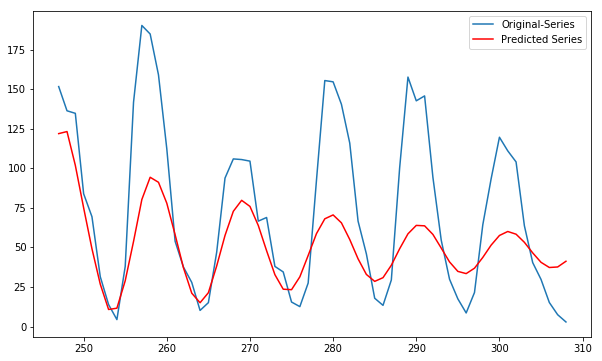

In [4]:
# Setting figure size
plt.figure(figsize=(10,6))
# Plot test data
plt.plot(test.SUNACTIVITY, label='Original-Series')
# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')
# Add legends
plt.legend()
# Display the plot
plt.show()

## ARMA

MAE: 33.95457845540467
MSE: 2041.3857010355755
EMSE: 45.18169652675268


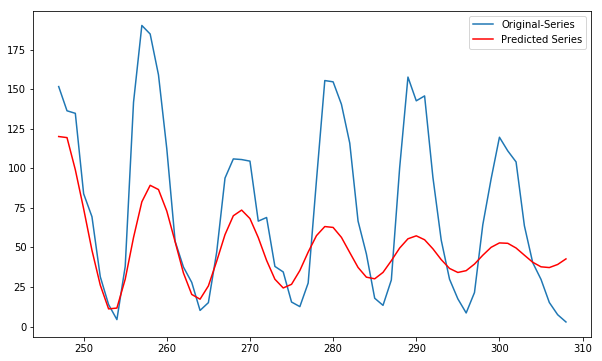

In [11]:
# import needful libraries
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data
data.drop('YEAR',axis=1,inplace=True)

# Split data into train and test set 
train_ratio=0.8
train=data[:int(train_ratio*len(data))]
test=data[int(train_ratio*len(data)):]

# AutoRegression Model training 
arma_model = ARMA(train, order=(10,1))
arma_model = arma_model.fit()

# make predictions
start_point = len(train)
end_point = start_point + len(test)-1
pred = arma_model.predict(start_point,end_point)

# Calculate erros
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("EMSE:",rmse)

# Setting figure size
plt.figure(figsize=(10,6))
# Plot test data
plt.plot(test, label='Original-Series')
# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')
# Add legends
plt.legend()
# Display the plot
plt.show()

## ARIMA

MAE: 36.934354201507624
MSE: 2527.643321884043
EMSE: 50.27567326137009


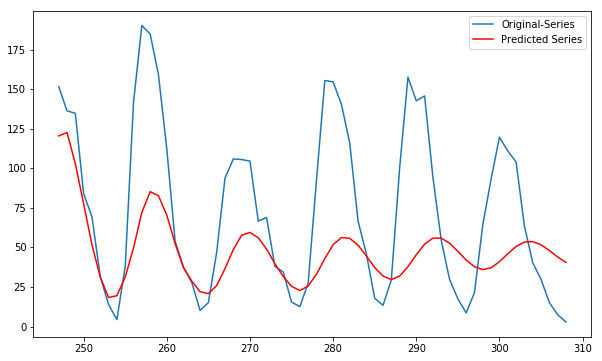

In [18]:
# import needful libraries
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data
data.drop('YEAR',axis=1,inplace=True)

# Split data into train and test set 
train_ratio=0.8
train=data[:int(train_ratio*len(data))]
test=data[int(train_ratio*len(data)):]

# AutoRegression Model training 
arima_model = ARIMA(train, order=(20,0,1))
arima_model = arima_model.fit()

# make predictions
start_point = len(train)
end_point = start_point + len(test)-1
pred = arima_model.predict(start_point,end_point)

# Calculate erros
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE:",mae)
print("MSE:",mse)
print("EMSE:",rmse)

# Setting figure size
plt.figure(figsize=(10,6))
# Plot test data
plt.plot(test, label='Original-Series')
# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')
# Add legends
plt.legend()
# Display the plot
plt.show()

## Generating Periodic Signals

Params [ 47.1880006   28.89947462   0.56827279   6.51178464   4.55214564
   0.29372076 -14.30924768 -18.16524123   0.06574835  -4.37789476]
Root mean square error 59.56205597915569
Mean absolute error 44.58158470150657
Mean absolute percentage error 65.16458348768887
Symmetric Mean absolute percentage error 78.4480696873044
Coefficient of determination -0.3635315489903188


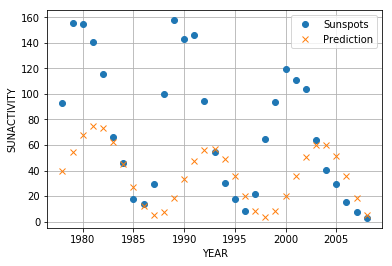

In [7]:
# Import required libraries
import numpy as np
import statsmodels.api as sm
from scipy.optimize import leastsq
import matplotlib.pyplot as plt


# Create model function
def model(p, t):
    C, p1, f1, phi1 , p2, f2, phi2, p3, f3, phi3 = p
    return C + p1 * np.sin(f1 * t + phi1) + p2 * np.sin(f2 * t + phi2) +p3 * np.sin(f3 * t + phi3)
 
# Create error function    
def error(p, y, t):
    return y - model(p, t)
 
# Create fit function    
def fit(y, t):
    p0 = [y.mean(), 0, 2 * np.pi/11, 0, 0, 2 * np.pi/22, 0, 0, 2 * np.pi/100, 0]
    params = leastsq(error, p0, args=(y, t))[0]
    return params

# Load the dataset
data_loader = sm.datasets.sunspots.load_pandas()
sunspots = data_loader.data["SUNACTIVITY"].values
years = data_loader.data["YEAR"].values

# Apply and fit the model 
cutoff = int(.9 * len(sunspots))
params = fit(sunspots[:cutoff], years[:cutoff])
print("Params", params)
 
pred = model(params, years[cutoff:])
actual = sunspots[cutoff:]
print("Root mean square error", np.sqrt(np.mean((actual - pred) ** 
2)))
print("Mean absolute error", np.mean(np.abs(actual - pred)))
print("Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/actual))
mid = (actual + pred)/2
print("Symmetric Mean absolute percentage error", 100 * 
np.mean(np.abs(actual - pred)/mid))
print("Coefficient of determination", 1 - ((actual - pred) ** 
2).sum()/ ((actual - actual.mean()) ** 2).sum())
year_range = data_loader.data["YEAR"].values[cutoff:]

# Plot the actual and predicted data points
plt.plot(year_range, actual, 'o', label="Sunspots")
plt.plot(year_range, pred, 'x', label="Prediction")
plt.grid(True)
# Add labels
plt.xlabel("YEAR")
plt.ylabel("SUNACTIVITY")
# Add legend
plt.legend()
# Display the chart
plt.show()

## Fourier Analysis

Index of max sine FFT [160 157 166 158 154]
Indices of max sunspots FFT [205 212 215 209 154]


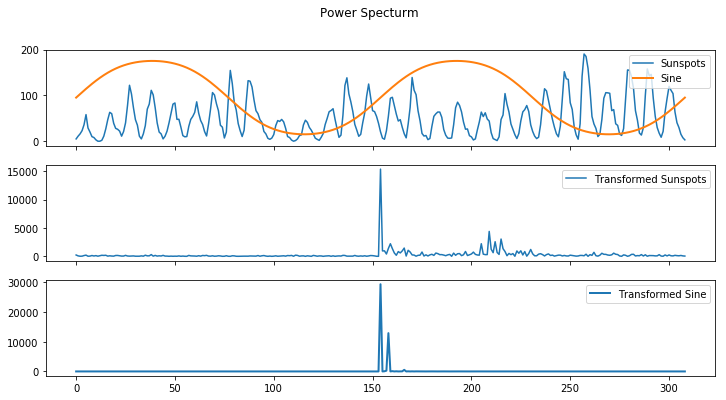

In [3]:
# Import required library
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.fftpack import rfft
from scipy.fftpack import fftshift


# Read the dataset
data = sm.datasets.sunspots.load_pandas().data
 
# Create Sine wave    
t = np.linspace(-2 * np.pi, 2 * np.pi, len(data.SUNACTIVITY.values))
mid = np.ptp(data.SUNACTIVITY.values)/2
sine = mid + mid * np.sin(np.sin(t))
 
# Compute FFT for Sine wave
sine_fft = np.abs(fftshift(rfft(sine)))
print("Index of max sine FFT", np.argsort(sine_fft)[-5:])
 
# Compute FFT for sunspots dataset   
transformed = np.abs(fftshift(rfft(data.SUNACTIVITY.values)))
print("Indices of max sunspots FFT", np.argsort(transformed)[-5:])
 
# Create subplots
fig, axs = plt.subplots(3,figsize=(12,6),sharex=True)
fig.suptitle('Power Specturm')
axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")
axs[0].plot(sine, lw=2, label="Sine")
axs[0].legend() # Set legends
axs[1].plot(transformed, label="Transformed Sunspots")
axs[1].legend() # Set legends
axs[2].plot(sine_fft, lw=2, label="Transformed Sine")
axs[2].legend() # Set legends

# Display the chart
plt.show()

## Spectral Analysis Filtering

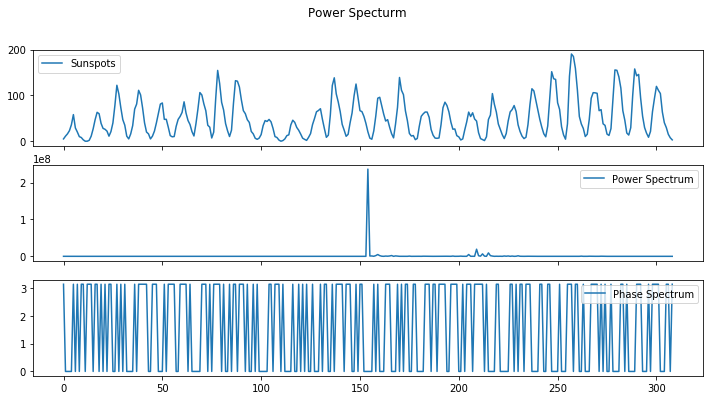

In [35]:
# Import required library
import numpy as np
import statsmodels.api as sm
from scipy.fftpack import rfft
from scipy.fftpack import fftshift
import matplotlib.pyplot as plt

# Read the dataset
data = sm.datasets.sunspots.load_pandas().data
 
# Compute FFT    
transformed = fftshift(rfft(data.SUNACTIVITY.values))
# Compute Power Spectrum
power=transformed ** 2
# Compute Phase
phase=np.angle(transformed) 

# Create subplots
fig, axs = plt.subplots(3,figsize=(12,6),sharex=True)
fig.suptitle('Power Specturm')
axs[0].plot(data.SUNACTIVITY.values, label="Sunspots")
axs[0].legend() # Set legends
axs[1].plot(power, label="Power Spectrum")
axs[1].legend() # Set legends
axs[2].plot(phase, label="Phase Spectrum")
axs[2].legend() # Set legends

# Display the chart
plt.show()
